In [ ]:
import pandas as pd
!pip install yfinance 
import yfinance as yf
!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()
import numpy as np
import statistics
import math
import seaborn as sns

Portfolio

In [ ]:
stocks=["BBAS3.SA","LREN3.SA","MULT3.SA","PARD3.SA","HYPE3.SA","CSAN3.SA","SULA11.SA"]# just example of stocks
weights=[0.2,0.2,0.2,0.1,0.1,0.1,0.1]#just example of weights, you can optimize these if you want
if len(weights)!= len(stocks):
  for a in range(len(stocks)):
    weights.append(1/len(stocks))
weights=np.array(weights)

In [ ]:
start_date="2017-12-29"# you can set the data, but 3 years is very common
df=yf.download(stocks,start=start_date,progress=False)["Adj Close"]
df.tail(6)#Viewing The Last Data

,BBAS3.SA,CSAN3.SA,HYPE3.SA,LREN3.SA,MULT3.SA,PARD3.SA,SULA11.SA
Date,,,,,,,
2021-11-26,30.760000,21.299999,27.840000,29.360001,19.650000,19.330000,25.469999
2021-11-29,30.809999,21.480000,27.350000,28.940001,19.620001,19.370001,25.730000
2021-11-30,31.840000,21.250000,27.120001,28.450001,19.600000,19.330000,25.020000
2021-12-01,31.299999,21.219999,26.799999,28.290001,19.219999,18.770000,24.410000
2021-12-02,32.160000,21.940001,27.559999,28.610001,20.040001,19.400000,25.910000
2021-12-03,32.200001,22.370001,28.280001,29.250000,20.700001,20.070000,26.469999


Retornos diários


In [ ]:
# viewing the Daily Returns of each stock
df=df.pct_change()
df=df.dropna()
df

,BBAS3.SA,CSAN3.SA,HYPE3.SA,LREN3.SA,MULT3.SA,PARD3.SA,SULA11.SA
Date,,,,,,,
2018-01-02,0.034884,0.025301,0.024800,-0.003945,0.019041,0.002994,0.011574
2018-01-03,0.012754,0.000000,-0.015577,0.012730,0.004014,-0.008955,0.028093
2018-01-04,0.009595,-0.002350,0.007347,0.005587,-0.001103,-0.003916,0.002628
2018-01-05,0.000000,0.010365,0.009256,-0.006111,0.007314,-0.020865,0.003144
2018-01-08,0.002376,-0.008627,-0.010283,-0.005031,-0.012467,-0.011736,-0.014629
...,...,...,...,...,...,...,...
2021-11-29,0.001625,0.008451,-0.017601,-0.014305,-0.001527,0.002069,0.010208
2021-11-30,0.033431,-0.010708,-0.008409,-0.016932,-0.001019,-0.002065,-0.027594
2021-12-01,-0.016960,-0.001412,-0.011799,-0.005624,-0.019388,-0.028970,-0.024381


Log returns anualizados

In [ ]:
# not necessary cell, just curiosity
log_returns=(np.log(1+df))**2#LR Squared
log_returns=(log_returns.mean()*(252/1)**0.5)# Anualized
log_returns=log_returns.to_frame()
log_returns=log_returns.rename(columns={0: 'RMS'})
log_returns

,RMS
BBAS3.SA,0.012039
CSAN3.SA,0.010607
HYPE3.SA,0.008249
LREN3.SA,0.012089
MULT3.SA,0.011832
PARD3.SA,0.012171
SULA11.SA,0.010246


Matriz de civariância 

In [ ]:
covariance=df.cov()*252#Anualized
covariance

,BBAS3.SA,CSAN3.SA,HYPE3.SA,LREN3.SA,MULT3.SA,PARD3.SA,SULA11.SA
BBAS3.SA,0.190436,0.098362,0.073366,0.118498,0.118421,0.088968,0.085409
CSAN3.SA,0.098362,0.167052,0.059949,0.085875,0.087451,0.071985,0.074305
HYPE3.SA,0.073366,0.059949,0.131508,0.080786,0.080087,0.069014,0.063807
LREN3.SA,0.118498,0.085875,0.080786,0.189734,0.140605,0.089920,0.088643
MULT3.SA,0.118421,0.087451,0.080087,0.140605,0.186701,0.079442,0.093643
PARD3.SA,0.088968,0.071985,0.069014,0.089920,0.079442,0.192223,0.064520
SULA11.SA,0.085409,0.074305,0.063807,0.088643,0.093643,0.064520,0.160654


Correlation Heatmap

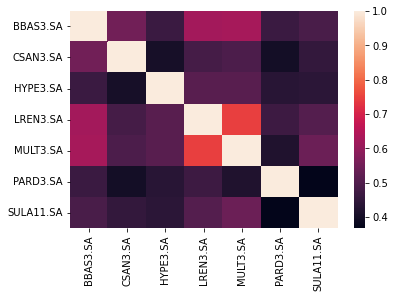

In [ ]:
variance=df.var()*252#Anualized
variance=variance.to_frame()
variance=variance.rename(columns={0:"Variance"})
volatility=np.sqrt(variance)
volatility=volatility.rename(columns={"Variance": "Volatility"})
correlation=df.corr()
sns.heatmap(correlation)

Volatilidade do portfólio

In [ ]:
portfolio_vol=np.sqrt(weights.T.dot(covariance).dot(weights))
portfolio_vol  # Calculating the portfolio volatility
expected_return=np.sum(df.mean()*weights)*252
expected_return

0.13747539972435535

Definindo a free rate


In [ ]:
r=0.045

Ações mais arriscadas

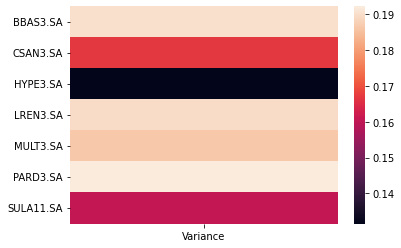

In [ ]:
sns.heatmap(variance)

Retornos individuais

In [ ]:
individual_returns_anualized=df.mean()*252
individual_returns_anualized=individual_returns_anualized.to_frame()
individual_returns_anualized.rename(columns={0:"Anual Returns %"})

,Anual Returns %
BBAS3.SA,0.153980
CSAN3.SA,0.304785
HYPE3.SA,0.043583
LREN3.SA,0.087171
MULT3.SA,0.073983
PARD3.SA,-0.018491
SULA11.SA,0.227392


Calculando Sharpe

In [ ]:
sharpe=(expected_return-r)/portfolio_vol
print(f"Sharpe Index: {sharpe.round(2)}")

Sharpe Index: 0.3
